# Utledning av Stackelberg med python og sympy

Laster nødvendige pakker:

In [154]:
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

In [155]:
Q1, Q2,mc1,mc2, a, b, pi,i=symbols('Q1 Q2 mc1 mc2 a b pi i')

def P_demand(Q,a,b):
    return a-b*Q

def profit(Q1,Q2,mc,a,b):
    return (P_demand(Q1+Q2,a,b)-mc)*Q1

### Løsning

Legg merke til at vi her kun utleder bedrift 2 sin optimale reaksjon. Dette er bedriften som følger etter, og bedrift 1 kan ta hensyn til denne i sin optimalisering.

In [156]:
d_profit2_Q=diff(profit(Q2,Q1,mc2,a,b),Q2)
d_profit2_Q

-Q2*b + a - b*(Q1 + Q2) - mc2

Setter vi denne lik null får vi førsteordensbetingelsen. Løser for det:

In [157]:
Q2_sol1=solve(d_profit2_Q,Q2)[0]
Q2_sol1

(-Q1*b + a - mc2)/(2*b)

Dette er nå kvantumet som 2 vil velge. Vi kan nå sette dette inn i profittfunksjonen til 1, og derivere:

In [170]:
d_profit1_Q=diff(profit(Q1,sol2,mc1,a,b),Q1)
d_profit1_Q

-Q1*b/2 + a - b*(Q1 + (-Q1*b + a - mc2)/(2*b)) - mc1

Setter vi uttrykket over lik null, får vi førsteordensbetingelsen. Den kan vi løse slik for kvantumet til bedrift 1:

In [160]:
Q1_sol=solve(d_profit1_Q,Q1)[0]
Q1_sol

(a - 2*mc1 + mc2)/(2*b)

Setter inn i kvantumet til 2 i kvantumet til 1 for å få eksplisitt løsning av dette:

In [171]:
Q2_sol2=Q2_sol1.subs({Q1:Q1_sol})
Q2_sol2

(a/2 + mc1 - 3*mc2/2)/(2*b)

Definerer en funksjon som kan regne ut likevektskvantaene:

In [164]:
stackelberg=lambdify(
    (a,b,mc1,mc2), 
    (Q1_sol,Q2_sol2)
)

### Plott og responskurver
Bedrift 1 sin responskurve er en konstant, for gitte parametre, så det er mer informativt å plotte bedrift 1 sin isokvant mot bedrift 2 sin responskurve. Bedrift 1 har valgt riktig mengde når isokvanten tangerer bedrift 2 sin responskurve. Definerer først henholdsvis isokvant og bedrift 2 sin responskurve:

In [172]:

isoquant_expr=solve(profit(Q1,Q2,mc1,a,b)-pi,Q2)[0]
R2=solve(d_profit2_Q,Q1)

isoquant=lambdify(
            (Q1,a,b,mc1,pi), 
            isoquant_expr
            )

    
R2=lambdify(
    (Q2,a,b,mc2), 
    R2[0]
)

display(isoquant_expr)
display(R2(Q2,a,b,mc1))

-Q1 + a/b - mc1/b - pi/(Q1*b)

(-2*Q2*b + a - mc1)/b

Definerer parametrene i modellen:

In [173]:
q = np.linspace(0,30,100)
a_value=40
b_value=1
mc1_value=10
mc2_value=5

Vi ønsker at etikketten til isokvanten skal angi hvilken profitt den er tegnet for, så vi lager en funksjon som gjøre det:

In [177]:
def isoquant_plot(q,a_value,b_value,mc1_value,pi_val):

    ax.plot(
            isoquant(q,a_value,b_value,mc1_value,pi_val),
            q,
            label=f'Isokvant profitt {pi_val}'
           )


Vi kan nå plotte modellen, og skrive ut resultatet for gitte parameter:

Løsningen er at 
bedrift 1 produserer 12.5 og tjener 78.125
bedrift 2 produserer 11.25 og tjener 126.5625
prisen blir 16.25





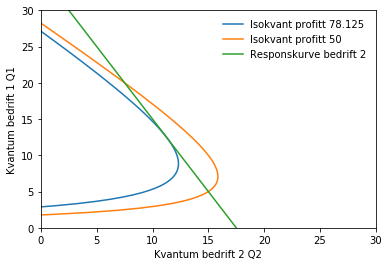

In [178]:


fig,ax=plt.subplots()
ax.set_ylabel('Kvantum bedrift 1 Q1')
ax.set_xlabel('Kvantum bedrift 2 Q2')


#drawing respons curves


isoquant_plot(q,a_value,b_value,mc1_value,
              profit(Q1sol,Q2sol,mc1_value,a_value,b_value)
             )
isoquant_plot(q,a_value,b_value,mc1_value,
              50
             )

isoquant_plot(q,a_value,b_value,mc1_value,
              50
             )

ax.plot(q,
        R2(q,a_value,b_value,mc2_value),
        label='Responskurve bedrift 2'
       )

#setting range for y-axis. 
plt.ylim((0,30))
plt.xlim((0,30))

#adding legend:
ax.legend(loc='upper right',frameon=False)


Q1sol, Q2sol=stackelberg(a_value,b_value,mc1_value,mc2_value)

print(f"""Løsningen er at 
bedrift 1 produserer {Q1sol} og tjener {profit(Q1sol,Q2sol,mc1_value,a_value,b_value)}
bedrift 2 produserer {Q2sol} og tjener {profit(Q2sol,Q1sol,mc2_value,a_value,b_value)}
prisen blir {P_demand(Q1sol+Q2sol,a_value,b_value)}


""")